In [48]:
#getting set up importing modules and esablishing needed data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# defining needed functions
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y




# exercise 1
Generating random numbers using the `np.random module`
We will be hammering the `np.random` module for the rest of this course and its sequel. Actually, you will probably call functions from this module more than any other while wearing your hacker statistician hat. Let's start by taking its simplest function, `np.random.random()` for a test spin. The function returns a random number between zero and one. Call `np.random.random()` a few times in the IPython shell. You should see numbers jumping around between zero and one.

In this exercise, we'll generate lots of random numbers between zero and one, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.

You may have noticed that, in the video, Justin generated 4 random numbers by passing the keyword argument $size=4$ to `np.random.random()`. Such an approach is more efficient than a for loop: in this exercise, however, you will write a for loop to experience hacker statistics as the practice of repeating an experiment over and over again.

- Seed the random number generator using the seed `42`.

- Initialize an empty array, random_numbers, of 100,000 entries to store the random numbers. Make sure you use `np.empty(100000)` to do this.

- Write a `for` loop to draw 100,000 random numbers using `np.random.random()`, storing them in the `random_numbers array`. To do so, loop over `range(100000)`.

- Plot a histogram of `random_numbers`. It is not necessary to label the axes in this case because we are just checking the random number generator. Hit 'Submit Answer' to show your plot.

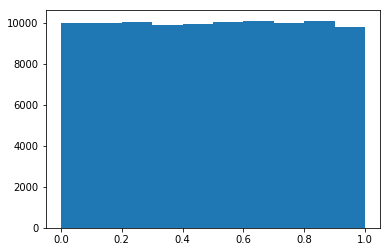

In [2]:
# set the seed
np.random.seed(42)

#initialize empty array
random_numbers = np.empty(100000)

#generating random numbers with a for loop
for i in range(100000):
    random_numbers[i]=np.random.random()
# plot hist   
_= plt.hist(random_numbers)

# Exersize 2
**The np.random module and Bernoulli trials**   
You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability $p$ of landing heads (success) and probability $1−p$ of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, perform_bernoulli_trials(n, p), which returns the number of successes out of `n` Bernoulli trials, each of which has probability `p` of success. To perform each Bernoulli trial, use the `np.random.random()` function, which returns a random number between zero and one.

*Instructions:*

- Define a function with signature `perform_bernoulli_trials(n, p)`.

- Initialize to zero a variable n_success the counter of Trues, which are Bernoulli trial successes.

- Write a `for` loop where you perform a Bernoulli trial in each iteration and increment the number of success if the result is `True`. Perform `n` iterations by looping over `range(n)`.

- To perform a Bernoulli trial, choose a random number between zero and one using np.random.random(). If the number you chose is less than `p`, increment `n_success` (use the `+= 1` operator to achieve this).

- The function returns the number of successes `n_success`.

In [3]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0
    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()
        # If less than p, it's a success so add one to n_success
        
        if random_number < p:
            n_success += 1
            
    return n_success

# Exercise 3
**How many defaults might we expect?**  
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is `p = 0.05`. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the `perform_bernoulli_trials()` function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to `True`, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

**Instructions**

- Seed the random number generator to 42.

- Initialize `n_defaults`, an empty array, using `np.empty()`. It should contain 1000 entries, since we are doing 1000 simulations.

- Write a `for` loop with `1000` iterations to compute the number of defaults per 100 loans using the `perform_bernoulli_trials()` function. It accepts two arguments: the number of trials `n` - in this case 100 - and the probability of success `p` - in this case the probability of a default, which is `0.05`. On each iteration of the loop store the result in an entry of `n_defaults`.

- Plot a histogram of `n_defaults`. Include the `normed=True` keyword argument so that the height of the bars of the histogram indicate the probability.
.

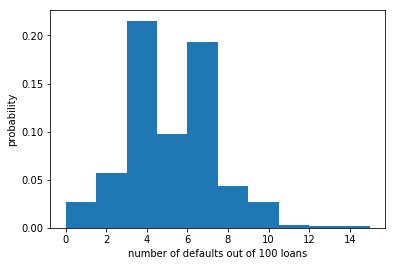

In [10]:
# set seed
np.random.seed(42)

#initialze defaults f
n_defaults = np.empty(1000)

for i in range (1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# normed changed to density as per library recemdnation     
_=plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Exercise 4 
**Will the bank fail?**  
Plot the number of defaults you got from the previous exercise, in your namespace as `n_defaults`, as a CDF. The ecdf() function you wrote in the first chapter is available.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

**Instructions**  

- Compute the `x` and `y` values for the ECDF of `n_defaults`.

- Plot the ECDF, making sure to label the axes. Remember to include `marker = '.'` and `linestyle = 'none'` in addition to `x` and `y` in your call `plt.plot()`.
- Compute the total number of entries in your `n_defaults` array that were greater than or equal to 10. To do so, compute a boolean array that tells you whether a given entry of `n_defaults` is `>= 10`. Then sum all the entries in this array using `np.sum()`. For example, `np.sum(n_defaults <= 5)` would compute the number of defaults with 5 or fewer defaults.

- The probability that the bank loses money is the fraction of `n_defaults` that are greater than or equal to 10. Print this result


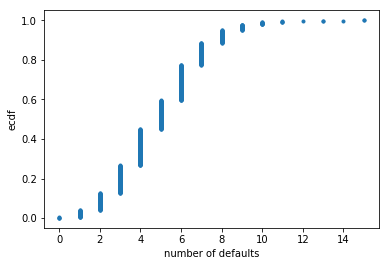

Probability of losing money = 0.022


In [24]:
#compute ecdf

x,y = ecdf(n_defaults)

# plot ecdf
_ = plt.plot(x,y,marker ='.',linestyle = 'none')
_ = plt.xlabel('number of defaults')
_ = plt.ylabel('ecdf')
_= plt.show()
# compute the total number of  100 loan simulations with 10 or more defaults 
n_lose_money = np.sum(n_defaults>=10)

#print the prob of losing money
print(f'Probability of losing money = {(n_lose_money/len(n_defaults))}')

# lecture

** Probability mass function (PMF)**
- the set of probabilities of discrete outcomes
- property of a probability distribution

** Probability distribution** 
- A mathematical description of outcomes
- a mathematical "story" that can be matched to a PMF

** Binomial distribution: **
- the number $r$ of successes in $n$ Bernoulli trials with probability $p$ of success, is Binomially distributed

- the number $r$ _of heads_ in _4 coin flips_ with probability _0.5_ of _heads_, is Binomially distributed

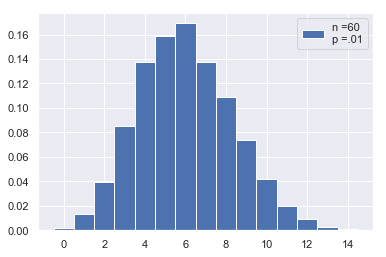

In [60]:
#samples
samples = np.random.binomial(60 ,0.1, size = 10000) 
# needs to be changes to prob
bins = np.arange(0, max(n_defaults)+ 1.5) - 0.5
#plot
_ = plt.hist(samples,bins=bins, density = True, label=['n =60 \np =.01'] )
_ = plt.legend()


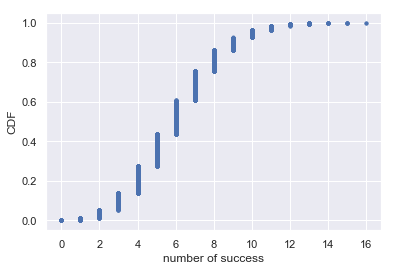

In [50]:
sns.set()
x,y = ecdf(samples)
_ = plt.plot(x,y,marker ='.',linestyle='none')
_ = plt.xlabel('number of success')
_ = plt.ylabel('CDF')

# exercise 5
**Sampling out of the Binomial distribution**

Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using `np.random.binomial()`. This is identical to the calculation you did in the last set of exercises using your custom-written `perform_bernoulli_trials()` function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.



**Instructions**

- set seed to 42 np.random.seed(42)

- Draw samples out of the Binomial distribution using `np.random.binomial()`. You should use parameters `n = 100` and `p = 0.05`, and set the `size` keyword argument to `10000`.

- Compute the CDF using your previously-written `ecdf()` function.

- Plot the CDF with axis labels. The x-axis here is the number of defaults out of 100 loans, while the y-axis is the CDF.


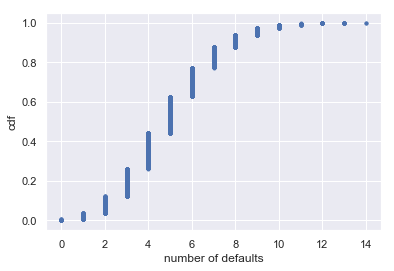

In [51]:
# set seed
np.random.seed(42)

#draw samples 
n_defaults = np.random.binomial(n = 100, p=0.05, size = 10000)

#compute the cdf using ecdf fucntion
x,y = ecdf(n_defaults)

#plot cdf
_= plt.plot(x,y,marker ='.', linestyle='none')
_= plt.xlabel('number of defaults')
_=plt.ylabel('cdf')


# exercise 6 
**Plotting the Binomial PMF**
As mentioned in the video, plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. The trick is setting up the edges of the bins to pass to `plt.hist()` via the `bins` keyword argument. We want the bins centered on the integers. So, the edges of the bins should be `-0.5, 0.5, 1.5, 2.5, ...` up to `max(n_defaults) + 1.5`. You can generate an array like this using `np.arange()` and then subtracting 0.5 from the array.

You have already sampled out of the Binomial distribution during your exercises on loan defaults, and the resulting samples are in the NumPy array n_defaults.

**Instructions**

- Using `np.arange()`, compute the bin edges such that the bins are centered on the integers. Store the resulting array in the variable `bins`.

- Use `plt.hist()` to plot the histogram of `n_defaults` with the `normed=True` and `bins=bins` keyword arguments.



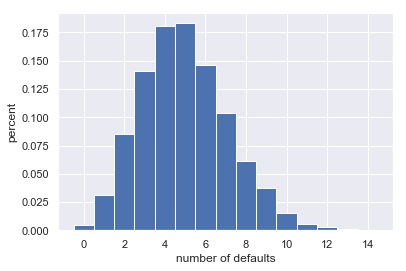

In [62]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults)+ 1.5) - 0.5

# Generate histogram and label axes
_= plt.hist(n_defaults,bins=bins,density=True)
_= plt.xlabel('number of defaults')
_= plt.ylabel('percent')

# lecture
**Poisson processes and the Poisson distribution**

**Poisson process**
- the timing of the next event is completly independent of when the previous event hapened

**examples**
- Natural births in a given hospital
- Hit on a website during a given hour
- Meteor strikes ect

**Poisson distribution**
- the number of $r$ arrivals of a Poisson process in a given time interval with average rate of $\lambda$ arrivals per interval is Poisson distributed.

- the number $r$ of _hits on a website_ in _one hour_ with an average hit rate of _6 hits per hour_ is Poisson distributed

- Limit of the Binomial distribution for low probability of success and large number of trials
    - rare events

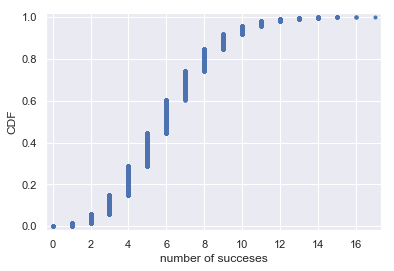

In [67]:
samples_poissonsamples  = np.random.poisson(6,size = 10000)
x,y = ecdf(samples)
_ = plt.plot(x,y,marker = '.', linestyle ='none')
plt.margins(0.02)
_ = plt.xlabel('number of succeses')
_ = plt.ylabel('CDF')

# exercise 7 
**Relationship between Binomial and Poisson distributions**

You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters $n$ and $p$ such that $np=10$.

**Instructions** 

- Using the np.random.poisson() function, draw 10000 samples from a Poisson distribution with a mean of 10.

- Print the mean and standard deviation using ` np.mean()` and `np.std()`

- Make a list of the n and p values to consider for the Binomial distribution. Choose n = [20, 100, 1000] and p = [0.5, 0.1, 0.01] so that np is always 10.

- Using np.random.binomial() inside a for loop in `range(3)`, draw 10000 samples from a Binomial distribution with each n, p pair and print the mean and standard deviation of the samples. There are 3 n, p pairs: 20, 0.5, 100, 0.1, and 1000, 0.01. These can be accessed inside the loop as n[i], p[i].

In [ ]:
samples_poisson

## some code here

# exercise 8 
**Was 2015 anomalous?**  
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

**Instructions:**

- Draw `10000` samples from a Poisson distribution with a mean of `251/115` and assign to `n_nohitters`.

- Determine how many of your samples had a result greater than or equal to 7 and assign to `n_large`.

- Compute the probability, `p_large`, of having 7 or more no-hitters by dividing `n_large` by the total number of samples (`10000`).

- print the probability that you calculated.

In [68]:
# draw samples 
n_nohitters = np.random.poisson(251/115,size = 10000)

# number of samples that are seven or greater
n_large = np.sum(n_nohitters>6 )

# probability of getting seven or more: p_large
p_large = n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.007
